In [7]:
import os
os.environ['AEON_DEPRECATION_WARNING'] = 'False'
os.environ['KMP_WARNINGS'] = 'off'

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 100)

import fnmatch

import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import seaborn as sns
import scipy as sp

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from scipy import stats

from aeon.transformations.collection.dictionary_based import PAA
import scipy.stats as stats

import sys
sys.path.append("../")

import warnings
warnings.filterwarnings("ignore")

In [8]:
# By Variance!!
selected_coeffs_variance = {  
    #"LenDB":   	[0, 1, 2, 3, 6, 7, 8, 9],
    "SCEDC":   		[8, 9, 10, 11, 12, 13, 14, 15],
    "Meier2019JGR": [0, 1, 2, 3, 4, 5, 6, 7],
    "SIFT1B":  		[0, 3, 7, 11, 12, 13, 14, 15],
    "OBS": 	 		[0, 1, 2, 3, 4, 13, 14, 15],
    "BIGANN":  		[2, 8, 9, 10, 11, 12, 14, 15],
    "Iquique":  	[0, 1, 2, 3, 4, 5, 6, 7],
    "ASTRO":   		[0, 1, 2, 3, 4, 5, 6, 7],
    "OBST2024":  	[6, 7, 8, 9, 10, 11, 12, 13],
    "NEIC":	 		[0, 1, 2, 3, 4, 5, 6, 7],
    "STEAD":		[0, 1, 2, 3, 6, 7, 8, 9],
    "ETHZ":	 		[0, 1, 2, 3, 4, 5, 6, 7],
    "TXED":			[3, 4, 5, 6, 7, 8, 9, 11],
    "PNW":	 		[0, 1, 2, 3, 4, 5, 6, 7],
    "ISC_EHB": 		[0, 1, 2, 3, 4, 5, 6, 9],
    "SALD": 	 	[0, 1, 2, 3, 4, 5, 6, 7],
    "DEEP1B":  		[0, 1, 3, 5, 9, 12, 13, 15],
}


speedup = {
    #"LenDB":	[24.769759],
    "SCEDC":	[7.025410],
    "Meier2019JGR":	[5.079399],
    "SIFT1B":	[3.584118],
    "OBS":	[1.635547],
    "BIGANN":	[2.557675],
    "Iquique":	[1.470009],    
    "ASTRO":	[1.388981],
    "OBST2024":	[1.337423],
    "NEIC":	[1.045959],
    "STEAD":	[1.094931],
    "ETHZ":	[1.139338],
    "TXED":	[1.097406],
    "PNW":	[0.992234],
    "ISC_EHB":	[1.112836],    
    "SALD":	[1.029678],
    "DEEP1B":	[1.018607],
}

original_length = {
    #"LenDB":	[256],
    "SCEDC":	[256],
    "Meier2019JGR":	[256],
    "SIFT1B":	[128],
    "OBS":	[256],
    "BIGANN":	[100],
    "Iquique":	[256],    
    "ASTRO":	[256],
    "OBST2024":	[256],
    "NEIC":	[256],
    "STEAD":	[256],
    "ETHZ":	[256],
    "TXED":	[256],
    "PNW":	[256],
    "ISC_EHB":	[256],    
    "SALD":	[128],
    "DEEP1B":	[96],
} 

selected_coeffs = selected_coeffs_variance

mean_coeffs = {}
for ds in selected_coeffs:
    mean_coeffs[ds] = [np.mean(selected_coeffs[ds])+1]

median_coeffs = {}
for ds in selected_coeffs:
    median_coeffs[ds] = [np.median(selected_coeffs[ds])+1]

max_coeffs = {}
for ds in selected_coeffs:
    max_coeffs[ds] = [np.max(selected_coeffs[ds])+1]


dominant_freq = {}
for ds in selected_coeffs:
    dominant_freq[ds] = [median_coeffs[ds][-1] / (original_length[ds][-1]+1)]


# print(mean_coeffs)
df_mean = pd.DataFrame(mean_coeffs).T
df_mean.rename(columns={0:"Mean DFT Coeff Selected"}, inplace=True)

df_max = pd.DataFrame(max_coeffs).T
df_max.rename(columns={0:"Max DFT Coeff Selected"}, inplace=True)

df_median = pd.DataFrame(median_coeffs).T
df_median.rename(columns={0:"Median DFT Coeff Selected"}, inplace=True)

df_speedup = pd.DataFrame(speedup).T
df_speedup.rename(columns={0:"Speedup"}, inplace=True)

df_original_length = pd.DataFrame(original_length).T
df_original_length.rename(columns={0:"Original Length"}, inplace=True)

#df_dominant_freq = pd.DataFrame(dominant_freq).T
#df_dominant_freq.rename(columns={0:"Dominant Frequency"}, inplace=True)


df = df_mean.join(df_speedup).join(df_max).join(df_median).join(df_original_length)#.join(df_dominant_freq)
display(df.head())



,Mean DFT Coeff Selected,Speedup,Max DFT Coeff Selected,Median DFT Coeff Selected,Original Length
SCEDC,12.500,7.025410,16,12.5,256
Meier2019JGR,4.500,5.079399,8,4.5,256
SIFT1B,10.375,3.584118,16,12.5,128
OBS,7.500,1.635547,16,4.5,256
BIGANN,11.125,2.557675,16,11.5,100


Pearson correlation coefficient: 0.5191492127651107


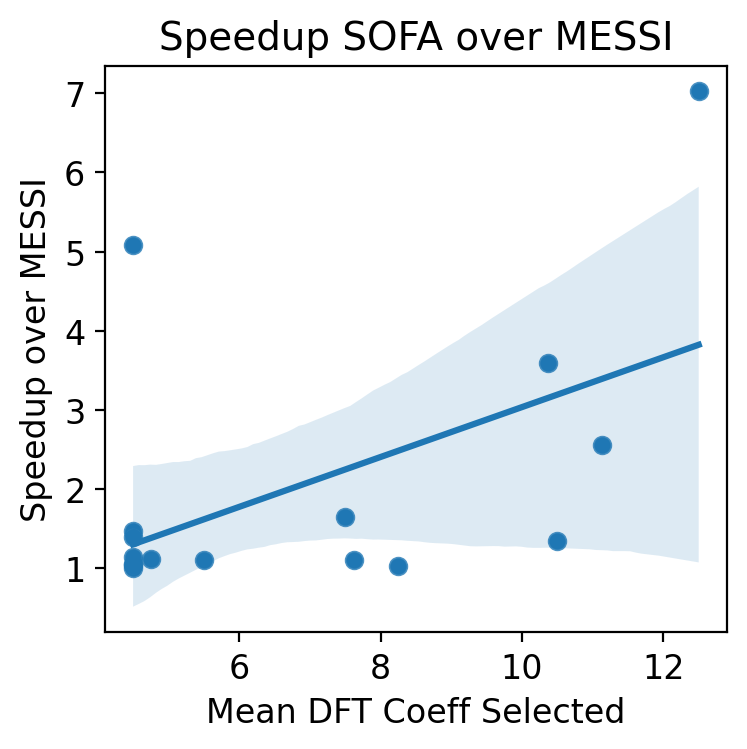

In [9]:
with plt.style.context({
    'font.size': 16,          # Default font size
    'axes.titlesize': 14,     # Font size for axes titles
    'axes.labelsize': 12,     # Font size for x and y labels
    'xtick.labelsize': 12,    # Font size for x tick labels
    'ytick.labelsize': 12,    # Font size for y tick labels
    'legend.fontsize': 10,    # Font size for legend
    'figure.titlesize': 14    # Font size for figure title
}):
    key = "Mean DFT Coeff Selected"
    key2 = "Speedup"
    fig, ax = plt.subplots(figsize=(4,4))
    sns.scatterplot(x=key, y=key2, data=df)
    sns.regplot(x=key, y=key2, data=df)
    
    ax.set_title("Speedup SOFA over MESSI")
    ax.set_ylabel("Speedup over MESSI")
    plt.tight_layout()
    plt.savefig("images/speedup_variance_mean.pdf", bbox_inches='tight')
    
    
    print(f"Pearson correlation coefficient: {df[key2].corr(df[key])}")

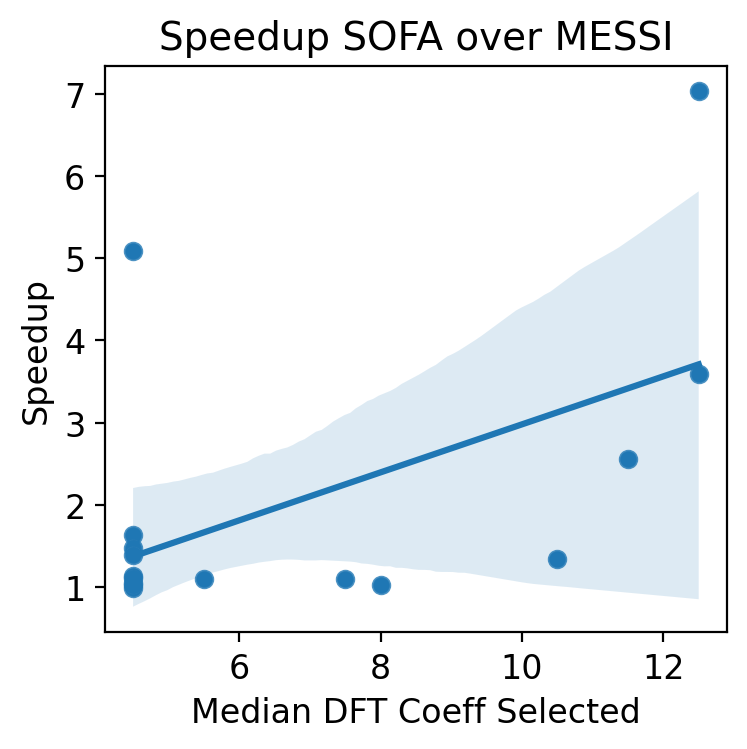

In [10]:
with plt.style.context({
    'font.size': 16,          # Default font size
    'axes.titlesize': 14,     # Font size for axes titles
    'axes.labelsize': 12,     # Font size for x and y labels
    'xtick.labelsize': 12,    # Font size for x tick labels
    'ytick.labelsize': 12,    # Font size for y tick labels
    'legend.fontsize': 10,    # Font size for legend
    'figure.titlesize': 14    # Font size for figure title
}):
    key = "Median DFT Coeff Selected"
    key2 = "Speedup"
    fig, ax = plt.subplots(figsize=(4,4))
    sns.scatterplot(x=key, y=key2, data=df)
    sns.regplot(x=key, y=key2, data=df)
    
    ax.set_title("Speedup SOFA over MESSI")
    plt.tight_layout()
    plt.savefig("images/speedup_variance_median.pdf", bbox_inches='tight')

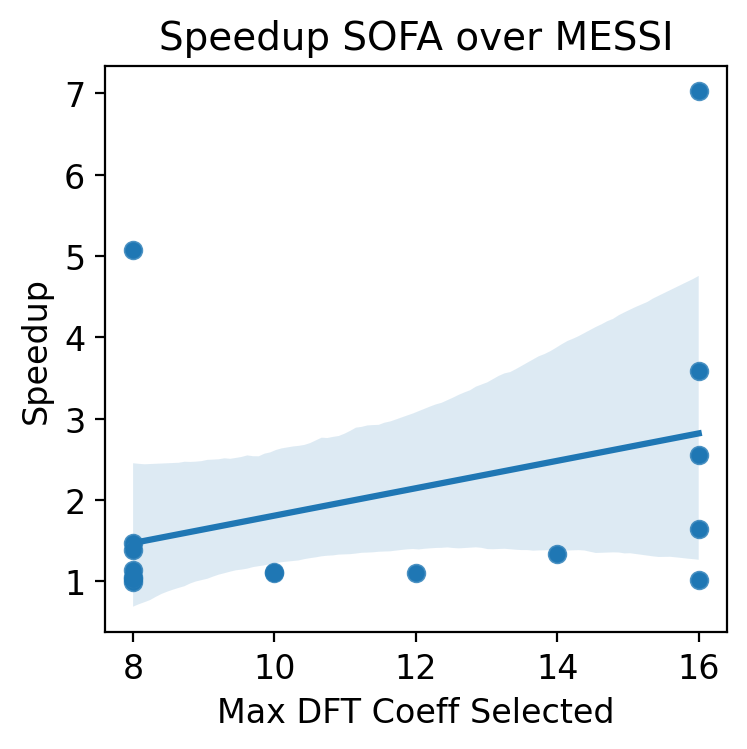

In [11]:
with plt.style.context({
    'font.size': 16,          # Default font size
    'axes.titlesize': 14,     # Font size for axes titles
    'axes.labelsize': 12,     # Font size for x and y labels
    'xtick.labelsize': 12,    # Font size for x tick labels
    'ytick.labelsize': 12,    # Font size for y tick labels
    'legend.fontsize': 10,    # Font size for legend
    'figure.titlesize': 14    # Font size for figure title
}):
    key = "Max DFT Coeff Selected"
    key2 = "Speedup"
    fig, ax = plt.subplots(figsize=(4,4))
    sns.scatterplot(x=key, y=key2, data=df)
    sns.regplot(x=key, y=key2, data=df)
    
    ax.set_title("Speedup SOFA over MESSI")
    plt.tight_layout()
    plt.savefig("images/speedup_variance_max.pdf", bbox_inches='tight')

In [12]:
np.mean([8, 9, 10, 11, 12, 13, 14, 15])

11.5